# K-nearest Neighbors approach

## 1. Import the packages

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import seaborn as sb
sb.set() #Set the default seaborn style for graphics
import random
np.random.seed(42)

---

## 2. Import the data

In [2]:
# Train and Test sets, as previously split
X_train = pd.read_csv('Data/x_train.csv')
X_test = pd.read_csv('Data/x_test.csv')
y_train = pd.read_csv('Data/y_train.csv') 
y_test = pd.read_csv('Data/y_test.csv')

In [3]:
# Train and Test sets for Feature-engineered data
X_train_EGIN = pd.read_csv('Data/x_trainEGIN.csv')
X_test_EGIN = pd.read_csv('Data/x_testEGIN.csv')

> With the use of a training set that has clearly labelled the category each entry belongs to (under 'Salary'), we can see that **k-nearest neighbors is a Supervised Learning Algorithm**.

---

## 3. Implementing k-nearest neighbors using default parameters
We will be running both the regular and feature engineered data to also observe if there are any changes in performance. The parameters will be kept to default for this initial run.

### 3a. Using regular data

In [50]:
knn1 = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train.values.ravel())

<AxesSubplot:>

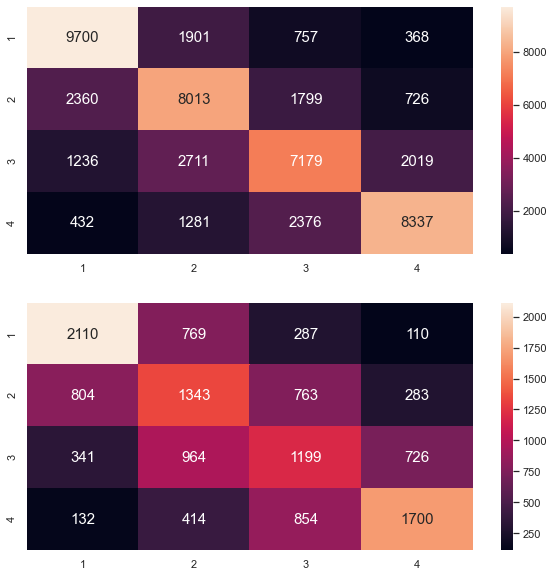

In [51]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, knn1.predict(X_train)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, knn1.predict(X_test)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

In [52]:
knn_f = f1_score(y_test, knn1.predict(X_test), average = 'weighted')
print('F1 (K nearest neighbours): ', "%.6f" % (knn_f))

F1 (K nearest neighbours):  0.497063


> We note that the the model has performed decently on both train and test sets, with the model seemingly performing better on the train set as visible from the confusion matrices. Performance patterns seem to be similar between the train and test sets.

### 3b. Using feature engineered data

In [61]:
knn1_EGIN = KNeighborsClassifier(n_neighbors = 5).fit(X_train_EGIN, y_train.values.ravel())

<AxesSubplot:>

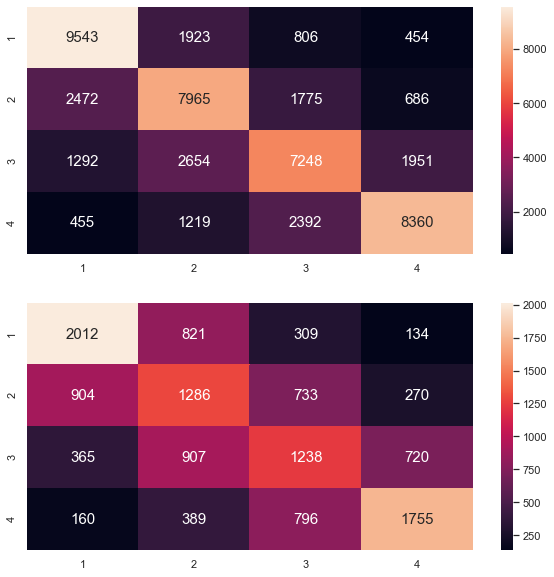

In [64]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, knn1_EGIN.predict(X_train_EGIN)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, knn1_EGIN.predict(X_test_EGIN)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

In [67]:
knn_f1_EGIN = f1_score(y_test, knn1_EGIN.predict(X_test_EGIN), average = 'weighted')
print('F1 (K nearest neighbours): ', "%.6f" % (knn_f1_EGIN))

F1 (K nearest neighbours):  0.491893


> We note that the model has performed decently on both train and test sets, with the model seemingly performing better on the train set as visible from the confusion matrices. Performance pattern between the train and test sets are similar. There is notably no improvement (in fact, a slight decrease) in performance when implementing with the feature engineered data instead.

---

## 4. Hyperparameter tuning
We will be exploring the various parameters of KNeighborsClassifier(). We first explore the effects of varying *leaf_size* before arriving at the decision to settle on a constant *leaf_size* value for the tuning. We will then implement a for loop to arrive at the optimal parameters and result.

### 4.1 Testing with different values of leaf_size

In [53]:
knnf2 = []

for i in range(1,200,10):
    knn2 = KNeighborsClassifier(n_neighbors = 5, leaf_size = i).fit(X_train, y_train.values.ravel())
    knn_pred2 = knn2.predict(X_test)
    knn_f2 = f1_score(y_test, knn_pred2, average = 'weighted')
    knnf2.append((i, knn_f2))
    
x = pd.DataFrame(knnf2, columns = ['n', 'F1'])

In [54]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(x.sort_values('F1'))

      n        F1
0     1  0.497063
17  171  0.497063
16  161  0.497063
15  151  0.497063
14  141  0.497063
13  131  0.497063
12  121  0.497063
11  111  0.497063
10  101  0.497063
9    91  0.497063
8    81  0.497063
7    71  0.497063
6    61  0.497063
5    51  0.497063
4    41  0.497063
3    31  0.497063
2    21  0.497063
1    11  0.497063
18  181  0.497063
19  191  0.497063


> We conclude that the **tuning of *leaf_size* is unlikely to affect performance**.

### 4.2 Finding the optimal n_neighbor parameter value with a for loop

We are aware that different values for n_neighbors will yield different results and f1_score.

In [7]:
knnf1 = []

for i in range(1,200,1):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train.values.ravel())
    knn_pred = knn.predict(X_test)
    knn_f1 = f1_score(y_test, knn_pred, average = 'weighted')
    knnf1.append((i, knn_f1))
                 
x = pd.DataFrame(knnf1, columns = ['n', 'F1'])

In [8]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(x.sort_values('F1'))

       n        F1
1      2  0.448683
0      1  0.460769
2      3  0.465073
3      4  0.487583
5      6  0.495484
4      5  0.497063
6      7  0.500499
196  197  0.503097
194  195  0.503354
198  199  0.503393
195  196  0.503609
188  189  0.503628
190  191  0.503855
192  193  0.503918
189  190  0.503928
197  198  0.503941
193  194  0.504314
187  188  0.504316
184  185  0.504706
185  186  0.504731
183  184  0.504756
141  142  0.504776
155  156  0.504795
181  182  0.504931
182  183  0.505038
191  192  0.505189
139  140  0.505298
129  130  0.505373
153  154  0.505378
186  187  0.505382
152  153  0.505421
156  157  0.505552
157  158  0.505659
154  155  0.505671
180  181  0.505690
146  147  0.505739
136  137  0.505745
158  159  0.505846
8      9  0.505920
164  165  0.505957
134  135  0.506057
140  141  0.506093
159  160  0.506113
142  143  0.506175
143  144  0.506213
138  139  0.506222
127  128  0.506288
148  149  0.506301
160  161  0.506325
125  126  0.506325
131  132  0.506401
130  131  0.

> The greatest F1 score of 0.519702 can be obtained with n_neighbors = 48

---

## 5. Optimal Parameters and Results

In [57]:
knn = KNeighborsClassifier(n_neighbors = 48).fit(X_train, y_train.values.ravel())

<AxesSubplot:>

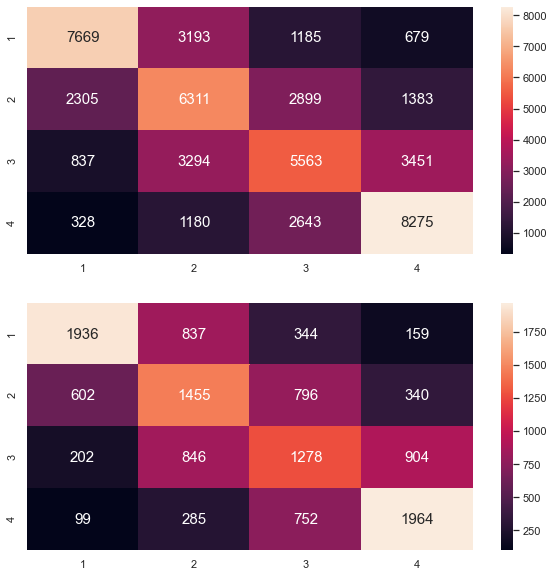

In [59]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
sb.heatmap(confusion_matrix(y_train, knn.predict(X_train)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[0], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])
sb.heatmap(confusion_matrix(y_test, knn.predict(X_test)), annot = True, annot_kws={'size': 15}, fmt='g', ax=axes[1], xticklabels = [1, 2, 3, 4], yticklabels=[1,2,3,4])

In [58]:
knn_f1 = f1_score(y_test, knn.predict(X_test), average = 'weighted')
print('F1 (K nearest neighbours): ', "%.6f" % (knn_f1))

F1 (K nearest neighbours):  0.519702


> The optimal performance result of KNeighborsClassifier() for our dataset is found to be at F1-score of 0.519702, at parameter *n_neighbors* = 48.

##### Additional:
We run an additional sequence of the for loop under the feature engineered data to compare if there is any potential improvement in performance.

In [70]:
knnf1_EGIN = []

for i in range(1,200,1):
    knn_EGIN = KNeighborsClassifier(n_neighbors = i).fit(X_train_EGIN, y_train.values.ravel())
    knn_pred_EGIN = knn_EGIN.predict(X_test_EGIN)
    knn_f1_EGIN = f1_score(y_test, knn_pred_EGIN, average = 'weighted')
    knnf1_EGIN.append((i, knn_f1_EGIN))
                 
x = pd.DataFrame(knnf1_EGIN, columns = ['n', 'F1'])

In [71]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(x.sort_values('F1'))

       n        F1
1      2  0.451153
0      1  0.458384
2      3  0.467940
3      4  0.481620
176  177  0.482734
175  176  0.483084
174  175  0.483137
177  178  0.483490
198  199  0.483561
193  194  0.483612
185  186  0.483816
192  193  0.483976
173  174  0.483981
197  198  0.484121
195  196  0.484128
187  188  0.484194
194  195  0.484279
172  173  0.484283
191  192  0.484365
178  179  0.484582
183  184  0.484585
169  170  0.484635
179  180  0.484672
196  197  0.484754
190  191  0.484761
188  189  0.484956
168  169  0.485037
170  171  0.485149
182  183  0.485175
171  172  0.485217
184  185  0.485228
180  181  0.485397
189  190  0.485403
186  187  0.485420
181  182  0.485521
167  168  0.485898
166  167  0.486115
165  166  0.486142
141  142  0.486185
105  106  0.486211
149  150  0.486519
164  165  0.486527
142  143  0.486726
163  164  0.486793
160  161  0.486807
106  107  0.486843
162  163  0.486888
145  146  0.486889
150  151  0.487017
158  159  0.487018
146  147  0.487060
159  160  0.

In [72]:
knn1_EGIN = KNeighborsClassifier(n_neighbors = 23).fit(X_train_EGIN, y_train.values.ravel())
knn_f1_EGIN = f1_score(y_test, knn1_EGIN.predict(X_test_EGIN), average = 'weighted')
print('F1 (K nearest neighbours): ', "%.6f" % (knn_f1_EGIN))

F1 (K nearest neighbours):  0.512647


Under the k-nearest neighbors algorithm, there is **no visible improvement in performance from applying the feature engineered data**.